## Lab 3 - Suy luận thống kê

**Họ tên**: Vo Van Duc

**MSSV**: 20110635

**STT**: 9

## Giới thiệu

Một nhóm nghiên cứu điều tra tốc độ đánh máy bằng tiếng Anh bằng hai hệ thống máy tính:

- **NO HELP**: Không có trợ giúp sửa lỗi chính tả tự động được cung cấp bởi hệ thống.

- **AUTO-CORRECTION**: Hệ thống liên tục cố gắng tự động sửa lỗi chính tả.

Các nhà nghiên cứu thử nghiệm hai bàn phím khác nhau: (i) bàn phím **QWERTY** và (ii) **AZERTY**.

Các nhà nghiên cứu đưa ra giả thuyết $H_1$ rằng nhập văn bản với tính năng sửa lỗi tự động (**AUTO-CORRECTION**) nhanh hơn so với nhập liệu không có trợ giúp (**NO HELP**). Họ cũng đưa ra giả thuyết $H_2$ rằng gõ bằng bàn phím **AZERTY** nhanh hơn gõ bằng bàn phím **QWERTY**.

Để kiểm tra hai giả thuyết này ($H_1$ và $H_2$), nhóm nghiên cứu tiến hành một cuộc thử nghiệm với 32 người nói tiếng Anh tham gia. Những người tham gia được chia thành hai nhóm độc lập, mỗi nhóm có 16 người. Ở nhóm đầu tiên ($G_1$), người tham gia sử dụng bàn phím **AZERTY**. Trong khi đó, ở nhóm thứ hai ($G_2$), người tham gia sử dụng bàn phím **QWERTY**. Tất cả 32 người tham gia thử nghiệm lần lượt cả hệ thống không có trợ giúp (**NO HELP**) và sửa lỗi tự động (**AUTO-CORRECTION**).

Để giảm sự sai lệch do tác động của thứ tự (do mệt mỏi hoặc tốn thời gian học), các nhà nghiên cứu thay đổi thứ tự trình bày của hai hệ thống như sau. Đối với mỗi loại bàn phím, đầu tiên, một nửa số người tham gia sử dụng hệ thống không có trợ giúp (**NO HELP**) và sau đó là hệ thống sửa lỗi tự động (**AUTO-CORRECTION**). Một nửa số người tham gia còn lại sử dụng chúng theo thứ tự ngược lại.

Để đánh giá hiệu suất đánh máy, các nhà nghiên cứu đo số từ gõ được trung bình mỗi phút (WPM).


## Bước 1. Thu thập dữ liệu

Giả sử các nhà nghiên cứu đã hoàn thành thí nghiệm và đã thu thập được kết quả. Ở đây, chúng ta mô phỏng quá trình tạo dữ liệu bằng cách lấy mẫu ngẫu nhiên từ một số quần thể cố định. Để tạo dữ liệu, bạn sẽ sử dụng đoạn mã bên dưới. Bạn chỉ cần chạy đoạn mã và sau đó sử dụng biến `data` làm tập dữ liệu của mình. Lưu ý rằng mỗi bạn sẽ tạo một tập dữ liệu khác nhau tùy vào mã số sinh viên (MSSV) và số thứ tự (STT) của mình (bạn cần thay đổi biến `MSSV` và `STT` cho đúng với MSSV và STT của bạn ở đoạn mã bên dưới), vì vậy kết luận của các phân tích của mỗi bạn có thể khác nhau.

Dữ liệu chứa năm cột với thông tin sau: (i) mã số người tham gia (`id`), (ii) loại bàn phím (`keyboard`: qwerty hoặc azerty), (iii) hệ thống (`system`: nohelp hoặc autocorrection), (iv) thứ tự trình bày của hệ thống (`systemorder`: 1 hoặc 2) và (v) số từ được gõ trung bình mỗi phút (`wpm`). Vì bạn không được yêu cầu phân tích ảnh hưởng của thứ tự trình bày của hệ thống, bạn có thể bỏ qua cột thứ 4 (thứ tự hệ thống).


In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm

MSSV = 20110635 # Thay giá trị này thành MSSV của bạn
STT = 9 # Thay giá trị này thành STT của bạn

# Nhóm azerty
m1_no = 29.4 # No Help
m1_yes = 36.5 # Auto-Correction

# Nhóm qwerty
m2_no = 28.1 # No Help
m2_yes = 37.2 # Auto-Correction

# standard deviation
sd = 8

# within-participant variability
dwpm_1 = norm.rvs(loc=0, scale=5, size=8, random_state=MSSV)
dwpm_2 = norm.rvs(loc=0, scale=5, size=8, random_state=STT)

# Datafame cho azerty group
df1 = pd.DataFrame({
    'id': list(range(8)), 
    'keyboard': np.repeat("azerty", 8), 
    'system': np.repeat("nohelp", 8), 
    'systemorder': np.repeat(1, 8), 
    'wpm': norm.rvs(loc=m1_no, scale=sd, size=8, random_state=STT) + dwpm_1
})

df2 = pd.DataFrame({
    'id': range(8), 
    'keyboard': np.repeat("azerty", 8), 
    'system': np.repeat("autocorrection", 8), 
    'systemorder': np.repeat(2, 8), 
    'wpm': norm.rvs(loc=m1_yes, scale=sd, size=8, random_state=STT*10) + dwpm_1
})

df3 = pd.DataFrame({
    'id': range(8,16), 
    'keyboard': np.repeat("azerty", 8), 
    'system': np.repeat("autocorrection", 8), 
    'systemorder': np.repeat(1, 8), 
    'wpm': norm.rvs(loc=m1_yes, scale=sd, size=8, random_state=STT*100) + dwpm_1
})

df4 = pd.DataFrame({
    'id': range(8,16), 
    'keyboard': np.repeat("azerty", 8), 
    'system': np.repeat("nohelp", 8), 
    'systemorder': np.repeat(2, 8), 
    'wpm': norm.rvs(loc=m1_no, scale=sd, size=8, random_state=STT*10**3) + dwpm_1
})

# Datafame cho qwerty group
df5 = pd.DataFrame({
    'id': range(16,24), 
    'keyboard': np.repeat("qwerty", 8), 
    'system': np.repeat("nohelp", 8), 
    'systemorder': np.repeat(1, 8), 
    'wpm': norm.rvs(loc=m2_no, scale=sd, size=8, random_state=STT*10**4) + dwpm_2
})

df6 = pd.DataFrame({
    'id': range(16,24), 
    'keyboard': np.repeat("qwerty", 8), 
    'system': np.repeat("autocorrection", 8), 
    'systemorder': np.repeat(2, 8), 
    'wpm': norm.rvs(loc=m2_yes, scale=sd, size=8, random_state=STT*10**5) + dwpm_2
})

df7 = pd.DataFrame({
    'id': range(24,32), 
    'keyboard': np.repeat("qwerty", 8), 
    'system': np.repeat("autocorrection", 8), 
    'systemorder': np.repeat(1, 8), 
    'wpm': norm.rvs(loc=m2_yes, scale=sd, size=8, random_state=STT*10**6) + dwpm_2
})

df8 = pd.DataFrame({
    'id': range(24,32), 
    'keyboard': np.repeat("qwerty", 8), 
    'system': np.repeat("nohelp", 8), 
    'systemorder': np.repeat(2, 8), 
    'wpm': norm.rvs(loc=m2_no, scale=sd, size=8, random_state=STT*10**7) + dwpm_2
})

# Kết hợp dữ liệu của hai nhóm
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)

# Làm tròn một chữ số thập phân
data["wpm"] = data["wpm"].round(1)

# Sắp xếp theo id
data.sort_values(by=['id'])

data.head()

,id,keyboard,system,systemorder,wpm
0,0,azerty,nohelp,1,43.6
1,1,azerty,nohelp,1,23.4
2,2,azerty,nohelp,1,28.9
3,3,azerty,nohelp,1,22.6
4,4,azerty,nohelp,1,25.2


## Bước 2. Thống kê mô tả

Viết mã để tính toán thống kê mô tả cho dữ liệu thử nghiệm của bạn. Thống kê mô tả sẽ bao gồm **trung bình (mean)**, **trung vị (median)** và **độ lệch chuẩn (standard deviation)** (i) đối với từng loại bàn phím riêng lẻ (AZERTY và QWERTY) và (ii) đối với từng hệ thống (NO HELP và AUTO-CORRECTION).


In [4]:
# Viết code của bạn ở đây
print('Thong ke ban phim azerty:')
isAzerty = data['keyboard'] == 'azerty'
azerty = data[isAzerty]
azerty.describe()

Thong ke ban phim azerty:


,id,systemorder,wpm
count,32.000000,32.000000,32.000000
mean,7.500000,1.500000,32.840625
std,4.683533,0.508001,8.486835
min,0.000000,1.000000,13.500000
25%,3.750000,1.000000,26.600000
50%,7.500000,1.500000,31.000000
75%,11.250000,2.000000,39.975000
max,15.000000,2.000000,49.900000


In [5]:
print('Thong ke ban phim qwerty:')
isQwerty = data['keyboard'] == 'qwerty'
qwerty = data[isQwerty]
qwerty.describe()

Thong ke ban phim qwerty:


,id,systemorder,wpm
count,32.000000,32.000000,32.000000
mean,23.500000,1.500000,31.384375
std,4.683533,0.508001,9.239680
min,16.000000,1.000000,17.800000
25%,19.750000,1.000000,24.225000
50%,23.500000,1.500000,31.200000
75%,27.250000,2.000000,40.175000
max,31.000000,2.000000,52.600000


In [6]:
print('Thong ke he thong No Help:')
isNoHelp = data['system'] == 'nohelp'
nohelp = data[isNoHelp]
nohelp.describe()

Thong ke he thong No Help:


,id,systemorder,wpm
count,32.000000,32.000000,32.000000
mean,15.500000,1.500000,28.146875
std,9.380832,0.508001,7.426717
min,0.000000,1.000000,13.500000
25%,7.750000,1.000000,23.200000
50%,15.500000,1.500000,26.750000
75%,23.250000,2.000000,33.125000
max,31.000000,2.000000,43.600000


In [7]:
print('Thong ke he thong AUTO-CORRECTION:')
isAutoCorrection = data['system'] == 'autocorrection'
autocorrection = data[isAutoCorrection]
autocorrection.describe()

Thong ke he thong AUTO-CORRECTION:


,id,systemorder,wpm
count,32.000000,32.000000,32.000000
mean,15.500000,1.500000,36.078125
std,9.380832,0.508001,8.418403
min,0.000000,1.000000,20.600000
25%,7.750000,1.000000,29.525000
50%,15.500000,1.500000,38.050000
75%,23.250000,2.000000,41.850000
max,31.000000,2.000000,52.600000


### Nhận xét

1. Doi voi tung loai ban phim: nguoi su dung ban phim azerty co WPM trung binh cao hon nguoi su dung ban phim qwerty

2. Doi voi tung loai he thong: nguoi su dung he thong Auto-Correction co WPM trung binh cao hon nguoi su dung he thong No Help



## Bước 3. Vẽ biểu đồ

Tạo biểu đồ hộp (boxplot) để tóm tắt bằng đồ thị các phân phối của `wpm` (i) cho hai loại bàn phím và (ii) cho hai hệ thống. Đồng thời tạo ra đồ `qqplot` để đánh giá trực quan mức độ mà các mẫu của bạn sai lệch so với phân phối chuẩn (Normal distribution). Bạn quan sát thấy gì?

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1e02ddd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1e02f8430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1e02dd940>,
 'medians': [<matplotlib.lines.Line2D at 0x1d1e02f8b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d1e02f8ee0>,
 'means': []}

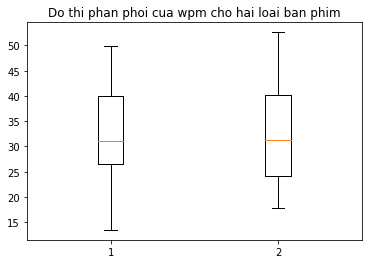

In [8]:
# Viết code của bạn ở đây
import matplotlib.pyplot as plt

data_azerty = azerty['wpm']
data_qwerty = qwerty['wpm']

fig_keyboard, ax_keyboard = plt.subplots()
ax_keyboard.set_title('Do thi phan phoi cua wpm cho hai loai ban phim')
ax_keyboard.boxplot([data_azerty, data_qwerty])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1e0a9da60>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1e0aad1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1e0a9d6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d1e0aad8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d1e0aadc70>,
 'means': []}

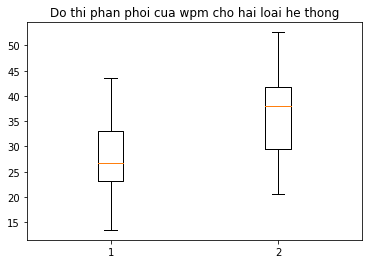

In [9]:
# Viết code của bạn ở đây

data_nohelp = nohelp['wpm']
data_autocorrection = autocorrection['wpm']

fig_system, ax_system = plt.subplots()
ax_system.set_title('Do thi phan phoi cua wpm cho hai loai he thong')
ax_system.boxplot([data_nohelp, data_autocorrection])

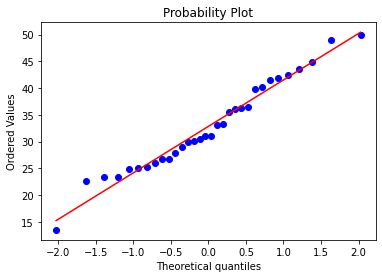

In [10]:
import statsmodels.api as sm
import pylab as pyl
import scipy.stats as stats

stats.probplot(data_azerty, dist="norm", plot=pyl)
pyl.show()

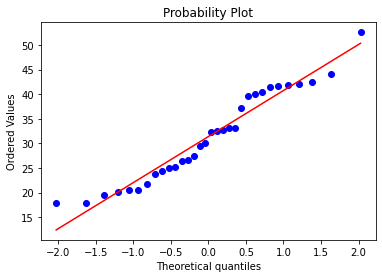

In [11]:
import statsmodels.api as sm
import pylab as pyl
import scipy.stats as stats

stats.probplot(data_qwerty, dist="norm", plot=pyl)
pyl.show()

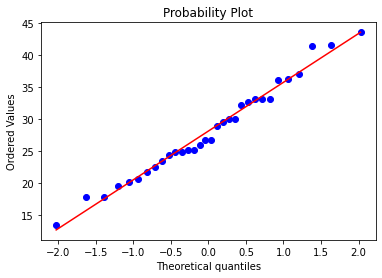

In [12]:
import statsmodels.api as sm
import pylab as pyl
import scipy.stats as stats

stats.probplot(data_nohelp, dist="norm", plot=pyl)
pyl.show()

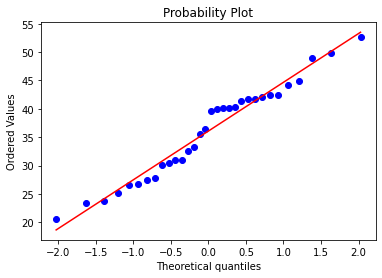

In [13]:
import statsmodels.api as sm
import pylab as pyl
import scipy.stats as stats

stats.probplot(data_autocorrection, dist="norm", plot=pyl)
pyl.show()

### Nhận xét

1. Biểu đồ phân phối của WPM cho hai loại bàn phím:

2. Với qqplot của các mẫu:
       . Phân phối chuẩn.
       . Có quan hệ tuyến tính, đường thẳng y = x gần như đi qua các điểm trên biểu đồ.
       . Các outlier ở 2 đầu biểu đồ có mức sai lệch nhiều hơn so với phân phối chuẩn.



## Bước 4. Khoảng tin cậy

Giả sử các quần thể có phân bố chuẩn. Viết mã để ước tính `wpm` trung bình cho mỗi hệ thống, cũng như sự khác biệt `wpm` trung bình. Sử dụng khoảng tin cậy 95% để ước tính các giá trị đó. Mã nên bao gồm phần tính toán và cả phần vẽ đồ thị các khoảng tin cậy. Kết luận của bạn là gì? Các kết quả có ủng hộ giả thuyết đầu tiên ($H_1$) của các nhà nghiên cứu không?

Tương tự, hãy viết một đoạn mã ước tính `wpm` trung bình cho từng loại bàn phím, cũng như sự khác biệt `wpm` trung bình (độc lập với việc có sử dụng tính năng tự động sửa lỗi hay không). Một lần nữa, hãy sử dụng khoảng tin cậy 95% để ước tính các trung bình đó và bao gồm cả phần tính toán và phần vẽ đồ thị các khoảng tin cậy. Kết luận của bạn bây giờ là gì? Các kết quả có ủng hộ giả thuyết thứ hai ($H_2$) của các nhà nghiên cứu không?

Ước tính wpm trung bình cho system autocorrection:  (33.55489220538128, 38.60135779461872)
Ước tính wpm trung bình cho keyboard azerty:  (30.296881282033407, 35.384368717966595)
Ước tính wpm trung bình cho keyboard qwerty:  (28.614982317029597, 34.153767682970404)
Ước tính wpm trung bình cho system nohelp:  (25.920878549699786, 30.372871450300217)


Text(0.5, 1.0, 'Khoảng tin cậy wpm trung bình')

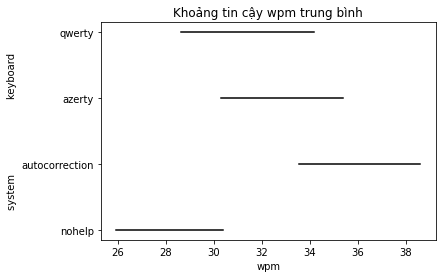

In [36]:
# Viết code của bạn ở đây
import math
mean_keyboard = data.groupby('keyboard', as_index= False)['wpm'].mean() 
mean_keyboard.rename(columns={'wpm' : 'mean_wpm'}, inplace = True);

standard_deviation_1 = data.groupby('keyboard', as_index= False)['wpm'].std()
standard_deviation_1.rename(columns={'wpm' : 'std_wpm'}, inplace = True);

mean_system = data.groupby('system', as_index= False)['wpm'].mean()
mean_system.rename(columns={'wpm' : 'mean_wpm'}, inplace = True);

standard_deviation_2 = data.groupby('system', as_index= False)['wpm'].std()
standard_deviation_2 .rename(columns={'wpm' : 'std_wpm'}, inplace = True);

#Tính khoảng tin cậy system autocorrection
autocorrection_mean = mean_system['mean_wpm'][0] #mean
autocorrection_size = len(autocorrection)
autocorrection_t_criticial = stats.t.ppf(q = 0.95, df = auto_size - 1)  #điểm giới hạn giữa việc giữ lại hoặc bác bỏ giả thuyết H0 (vô hiệu)
autocorrection_standard_deviation = standard_deviation_2['std_wpm'][0] #standard deviation
autocorrection_sigma =autocorrection_standard_deviation/math.sqrt(autocorrection_size) #standard deviation estimate
autocorrection_margin_of_error = autocorrection_sigma*autocorrection_t_criticial 
autocorrection_confidence_interval = (autocorrection_mean - autocorrection_margin_of_error, autocorrection_mean + autocorrection_margin_of_error)  #khoảng tin cậy
print('Ước tính wpm trung bình cho system autocorrection: ', autocorrection_confidence_interval)

#Tính khoảng tin cậy keyboard azerty
azerty_mean = mean_keyboard['mean_wpm'][0]  #mean
azerty_size = len(azerty)
azerty_t_criticial = stats.t.ppf(q = 0.95, df = azerty_size - 1)  #điểm giới hạn giữa việc giữ lại hoặc bác bỏ giả thuyết H0 (vô hiệu)
azerty_standard_deviation = standard_deviation_1['std_wpm'][0] #standard deviation
azerty_sigma = azerty_standard_deviation/math.sqrt(azerty_size)  #standard deviation estimate
azerty_margin_of_error = azerty_sigma*azerty_t_criticial 
azerty_confidence_interval = (azerty_mean - azerty_margin_of_error, azerty_mean + azerty_margin_of_error) #khoảng tin cậy
print('Ước tính wpm trung bình cho keyboard azerty: ', azerty_confidence_interval)

#Tính khoảng tin cậy keyboard qwerty
qwerty_mean = mean_keyboard['mean_wpm'][1] #mean
qwerty_size = len(qwerty)
qwerty_t_criticial = stats.t.ppf(q = 0.95, df = qwerty_size - 1)  #điểm giới hạn giữa việc giữ lại hoặc bác bỏ giả thuyết H0 (vô hiệu)
qwerty_standard_deviation = standard_deviation_1['std_wpm'][1] #standard deviation
qwerty_sigma = qwerty_standard_deviation/math.sqrt(qwerty_size) #standard deviation estimate
qwerty_margin_of_error = qwerty_sigma*qwerty_t_criticial 
qwerty_confidence_interval = (qwerty_mean - qwerty_margin_of_error, qwerty_mean + qwerty_margin_of_error)   #khoảng tin cậy
print('Ước tính wpm trung bình cho keyboard qwerty: ', qwerty_confidence_interval)

#Tính khoảng tin cậy system nohelp
nohelp_mean = mean_system['mean_wpm'][1] #mean 
nohelp_size = len(nohelp) 
nohelp_t_criticial = stats.t.ppf(q = 0.95, df = nohelp_size - 1) #điểm giới hạn giữa việc giữ lại hoặc bác bỏ giả thuyết H0 (vô hiệu)
nohelp_standard_deviation = standard_deviation_2['std_wpm'][1] #standard deviation
nohelp_sigma = nohelp_standard_deviation/math.sqrt(nohelp_size) #standard deviation estimate
nohelp_margin_of_error = nohelp_sigma*nohelp_t_criticial 
nohelp_confidence_interval = (nohelp_mean - nohelp_margin_of_error, nohelp_mean + nohelp_margin_of_error)  #khoảng tin cậy
print('Ước tính wpm trung bình cho system nohelp: ', nohelp_confidence_interval)

#Vẽ biểu đồ 
data_dict = {}
data_dict['category'] = ['nohelp','autocorrection', 'azerty', 'qwerty']
data_dict['lower'] = [nohelp_mean - nohelp_error,autocorrection_mean - autocorrection_error, azerty_mean - azerty_error, qwerty_mean - qwerty_error]
data_dict['upper'] = [nohelp_mean + nohelp_error,autocorrection_mean + autocorrection_error, azerty_mean + azerty_error, qwerty_mean + qwerty_error]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),color='black')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.xlabel('wpm')
plt.ylabel('system                        keyboard')
plt.title('Khoảng tin cậy wpm trung bình')

### Nhận xét và kết luận

1. Nhập văn bản với tính năng sửa lỗi tự động (AUTO-CORRECTTION) nhanh hơn so với nhập liệu không có trợ giúp (NO HELP). Kết quả ủng hộ giả thuyết H1.

2. Với khoảng tin cậy 95%, gõ bằng bàn phím AZERTY chỉ nhanh hơn gõ bằng bàn phín QWERTY ở phần lower còn phần upper thì không khác biệt nhiều, nên giả thuyết H2 cũng không chắc sẽ đúng: gõ bằng bàn phím AZERTY nhanh hơn gõ bằng bàn phím QWERTY




## Bước 5. Kiểm định ý nghĩa thống kê

Viết một đoạn mã để tiến hành các kiểm định ý nghĩa thống kê thích hợp để kiểm tra hai giả thuyết ($H_1$ và $H_2$). Kết luận của bạn là gì? Kết quả của các phép kiểm định ý nghĩa thống kê có phù hợp với khoảng tin cậy mà bạn đã xây dựng cho Bước 4 không?

In [48]:
# Viết code của bạn ở đây
'''H1: mean_autocorrection > mean_nohelp  nên ta có  H0: mean_autocorrection <= mean_nohelp
   
   Miền bác bỏ: {T: T > z}; vì sử dụng khoảng tin cậy 95% nên alpha = 0.05 '''
z = stats.norm.ppf(0.95)
numerator_1 = autocorrection_mean - nohelp_mean
denominator_1 = math.sqrt((autocorrection_standard_deviation**2/autocorrection_size) + (nohelp_standard_deviation**2/nohelp_size))
T1= numerator_1/denominator_1
print('z =',z)
print('T1 =',T1)

'''H2: mean_azerty > mean_qwerty nên ta có H0: meab_azerty <= mean_qwerty
   Miễn bác bỏ: {T: T > z; vì sử dụng khoảng tin cậy 95% nên alpha = 0.05}'''
numerator_2 = azerty_mean - qwerty_mean 
denominator_2 = math.sqrt((azerty_standard_deviation**2/azerty_size) + (qwerty_standard_deviation**2/qwerty_size))
T2 = numerator_2/denominator_2
print('T2 =', T2)
t_s, p = stats.ttest_ind(azerty.wpm, qwerty.wpm)
print(f"Giá trị p kiểm định hai phía: p = {p}")
print(f"Vì giả thuyết là kiểm định một phía nên p = p / 2 = {p} / 2 = {p/2}")
p = p / 2
if (p > 0.05):
    print(f"Ta có p_value = {p} > 0.05 ==> Ta chấp nhận H0")
else:
    print(f"Ta có p_value = {p} < 0.05 ==> Ta bác bỏ H0, chấp nhận H2")

z = 1.6448536269514722
T1 = 3.9965679256969286
T2 = 0.6566156982034421
Giá trị p kiểm định hai phía: p = 0.5138579043104321
Vì giả thuyết là kiểm định một phía nên p = p / 2 = 0.5138579043104321 / 2 = 0.25692895215521605
Ta có p_value = 0.25692895215521605 > 0.05 ==> Ta chấp nhận H0


### Nhận xét và kết luận

1. Vì T1 > z thuộc miền bác bỏ nên bác bỏ H0 (mean_autocorrection <= mean_nohelp), chấp nhận H1 (mean_autocorrection > mean_nohelp). Vì thế chấp nhận giả thuyết H1. Nhập văn bản với tính năng sửa lỗi tự động (AUTO-CORRECTTION) nhanh hơn so với nhập liệu không có trợ giúp (NO HELP)

2. Vì T2 < z không thuộc miền bác bỏ nên không đủ cơ sở để bác bỏ H0. Nhưng p_value lớn hơn 0.05 nên chấp nhận H0, bác bỏ H2. Vậy gõ bằng bàn phím AZERTY nhanh hơn gõ bằng bàn phím QWERTY là không đúng.

